# Cycad tutorial notebook

Make the relevant imports

In [1]:
from cycad import cycad
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from ipywidgets import interact, interactive, fixed, interact_manual

### Make a cycad plot from a single run
Define a data folder and echem file location:

In [2]:
data_folder = "Mo4O11_zip/Mo4O11_18A_1C_10exp_2mmrock_3"
echem_file = "Mo4O11_echem_export/4_10222021_mbp18A_Mo4O11_113pouch_1C_3_01_GCPL_C03_absolute.txt"

Instantiate a cycad object, load data, run autocorrelation and plot:

 14%|█▍        | 47/336 [00:00<00:05, 55.33it/s]/Users/yuewu/opt/anaconda3/envs/ssrl1/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
100%|██████████| 56280/56280 [00:02<00:00, 19002.21it/s]


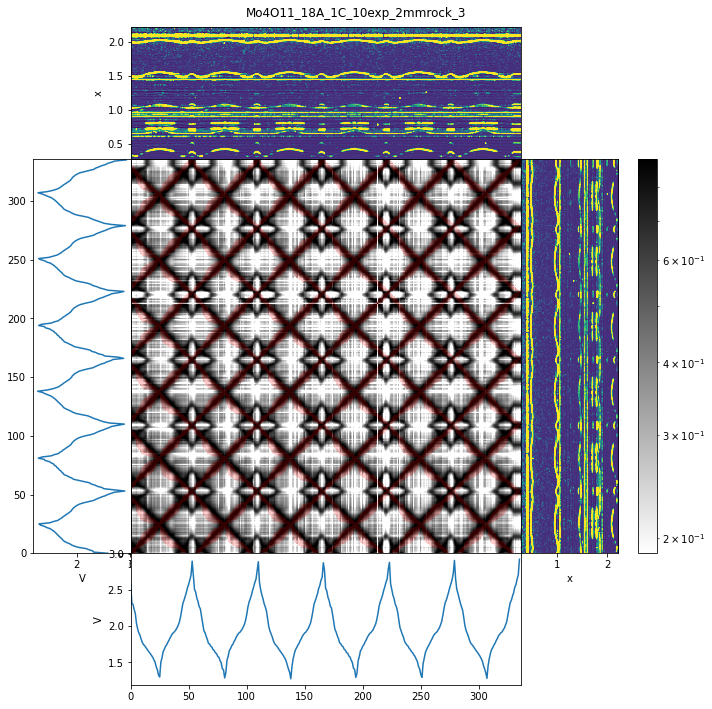

In [3]:
# Instantiate cycad object
run_1 = cycad()

# Load data folder and read data 
run_1.read_folder(data_folder, 'xye')
run_1.read_echem_mpt(echem_file)

# Restrict data range for XRD data
run_1.df = run_1.df[200:1600].reset_index(drop=True)

# Generation correlation matrices for XRD and echem data
run_1.autocorrelate(bkg_subtract=True)
run_1.autocorrelate_ec()

# Make cycad plot
run_1.plot(
    echem=True,
    save=True,
    filename='plot.png'
)

### Advanced usage

If you want to interact more directly with the data objects

Let's generate synthetic 'cycling voltages' as a dataframe.

In real usage, you would read your echem file into a dataframe here.

<AxesSubplot:>

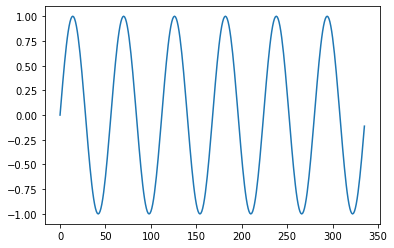

In [4]:
import numpy as np
import pandas as pd

x = np.arange(0, 12*np.pi, 12*np.pi/run_1.df_echem.shape[1])
x = np.sin(x)
x = pd.Series(x)
x.plot()

Here we get the _in situ_ data from the previous run as a dataframe instead of reading anything in

In [6]:
data = run_1.df

Now we instantiate a new cycad object but pass data to it with the two data objects we just generated. We regenerate the correlation plot from the real data, but overlay it with the synthetic cycling data.

100%|██████████| 56280/56280 [00:02<00:00, 19222.56it/s]


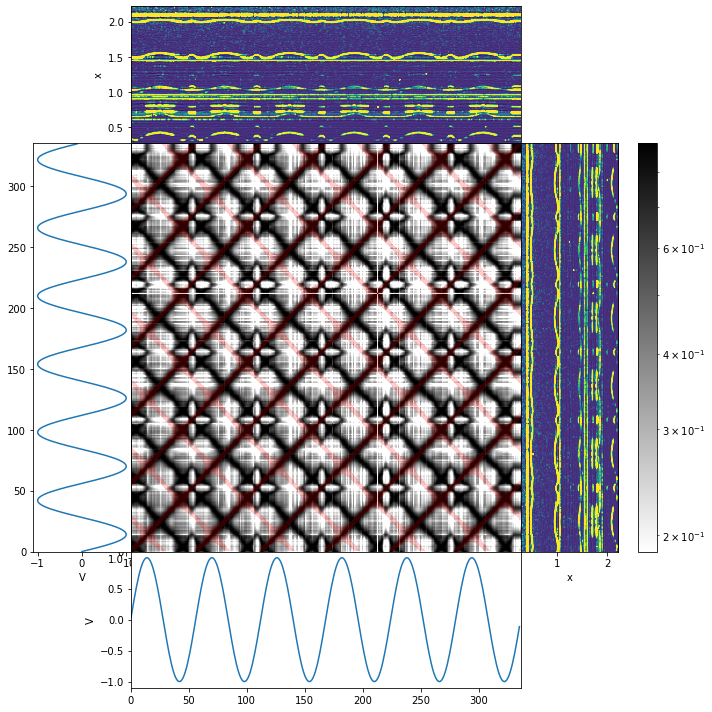

In [7]:
# Instantiate cycad object
run_2 = cycad()

# Pass in situ data dataframe directly to cycad
run_2.df = data
# Pass echem series directly to cycad
run_2.read_echem_df(x)

# Generation correlation matrices for XRD and echem data
run_2.autocorrelate(bkg_subtract=False)
run_2.autocorrelate_ec()

# Make cycad plot
run_2.plot(
    echem=True,
    save=True,
    filename='plot2.png'
)

If you want to generate your own plots with individual cycad components directly, you can access them as cycad attributes - e.g.:


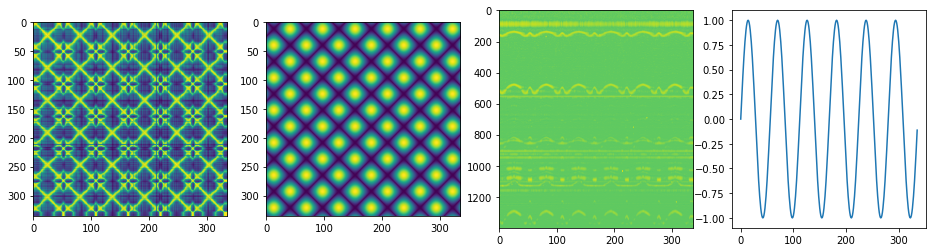

In [21]:
fig, axes = plt.subplots(1,4, figsize=(16,4))
axes[0].imshow(run_2.correlation_matrix)
axes[1].imshow(run_2.correlation_matrix_ec)
axes[2].imshow(run_2.df, aspect='auto', norm=LogNorm())
axes[3].plot(run_2.df_echem.T)
plt.show()

### Multiple runs

To look at multiple runs over multiple folders, use a loop structure as described below.

Make a list of your data sources:

In [4]:
data_sources = [
    ("<path to data folder 1>", "<path to echem file 1>"),
    ("<path to data folder 2>", "<path to echem file 2>"),
    ("<path to data folder 3>", "<path to echem file 3>"),
]

Loop through the list of sources and run cycad on each one. Append to a list if you want to interact with them further.

In [ ]:
runs = []

for data_folder, echem_file in data_sources:
    run = cycad.cycad()
    run.read_folder(data_folder, 'xye')
    run.read_echem_mpt(echem_file)
    run.autocorrelate(bkg_subtract=True)
    run.autocorrelate_ec()
    run.plot(
        echem=True,
        save=True,
        # filename='plot2.png' # If not set filename will be auto-generated based on folder name
    )